In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/gurgaon_properties_cleaned_v2.csv')

In [3]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2346,flat,parsvnath exotica,sector 53,4.80,14680.0,3270.0,Built Up area: 2895 (268.95 sq.m.),3,4,3+,...,NaN,2895.0,NaN,0,0,0,0,0,0,69
2029,house,independent,sector 57,3.60,20833.0,1728.0,Plot area 192(160.54 sq.m.),4,4,2,...,NaN,1728.0,NaN,1,1,1,1,0,0,110
3445,flat,dlf the ultima,sector 81,2.30,14603.0,1575.0,Super Built up area 2100(195.1 sq.m.)Carpet ar...,3,4,3+,...,2100.0,NaN,1575.0,0,1,0,0,0,1,119
2728,flat,shree vardhman victoria,sector 70,1.65,8461.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3,4,3,...,1950.0,NaN,1161.0,0,1,0,0,1,1,49
3544,house,independent,sector 31,3.50,24155.0,1449.0,Plot area 161(134.62 sq.m.),4,4,3,...,NaN,1449.0,NaN,0,0,1,0,0,1,70


In [4]:
df.shape

(3814, 23)

In [5]:
df.duplicated().sum()

np.int64(126)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3688 entries, 0 to 3813
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3688 non-null   object 
 1   society              3687 non-null   object 
 2   sector               3688 non-null   object 
 3   price                3663 non-null   float64
 4   price_per_sqft       3663 non-null   float64
 5   area                 3663 non-null   float64
 6   areaWithType         3688 non-null   object 
 7   bedRoom              3688 non-null   int64  
 8   bathroom             3688 non-null   int64  
 9   balcony              3688 non-null   object 
 10  floorNum             3669 non-null   float64
 11  facing               2633 non-null   object 
 12  agePossession        3688 non-null   object 
 13  super_built_up_area  1875 non-null   float64
 14  built_up_area        1700 non-null   float64
 15  carpet_area          1874 non-null   float6

# property_type

<Axes: xlabel='property_type'>

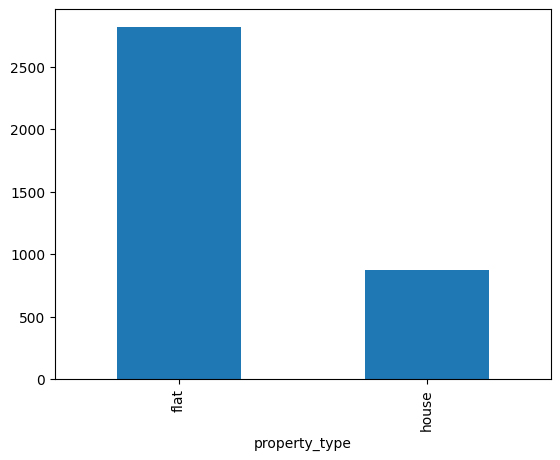

In [9]:
df['property_type'].value_counts().plot(kind='bar',)

### Observations
* Flats are in majority(75 percent) and there are less number of houses(~25 percent)
* No missing values

# society

In [10]:
df['society'].value_counts()

,count
society,
independent,499
tulip violet,75
ss the leaf,73
dlf new town heights,42
shapoorji pallonji joyville gurugram,42
...,...
global height,1
ompee k s residency,1
anamika enclave,1


In [11]:
df['society'].value_counts().shape

(674,)

In [12]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

# .cumsum() ---> Does a cumulative sum of the percentages.
# normalize=True means: It will return percentages (proportions), not raw counts (0.05 means 5% of the data)

,proportion
society,
tulip violet,0.023526
ss the leaf,0.046424
shapoorji pallonji joyville gurugram,0.059598
dlf new town heights,0.072773
signature global park,0.083752
...,...
indiabulls enigma,0.490590
ats kocoon,0.494668
ansal heights 86,0.498745


In [13]:
df['society'].value_counts()

,count
society,
independent,499
tulip violet,75
ss the leaf,73
dlf new town heights,42
shapoorji pallonji joyville gurugram,42
...,...
global height,1
ompee k s residency,1
anamika enclave,1


In [14]:
# Counts how many times each society name appears in the dataset.
society_counts = df['society'].value_counts()

frequency_bins = {
    'Very high (>100)' : (society_counts > 100).sum(),
    'High (50-100)' : ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very high (>100)': np.int64(1),
 'High (50-100)': np.int64(2),
 'Average (10-49)': np.int64(92),
 'Low (2-9)': np.int64(273),
 'Very Low (1)': np.int64(306)}

<Axes: xlabel='society'>

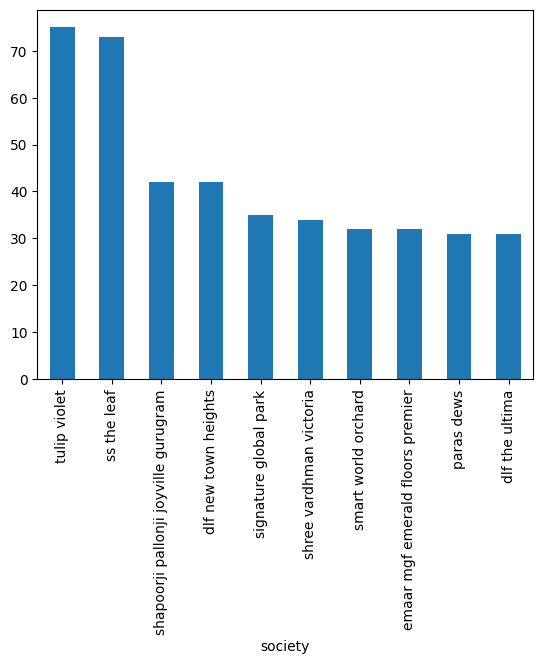

In [15]:
# top 10 socities
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [16]:
df['society'].isnull().sum()

np.int64(1)

###Observations
* Around 13% properties comes under independent tag.

* There are 675 societies.

* The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies...

  * Very High (>100): Only 1 society has more than 100 listings.

  * High (50-100): 2 societies have between 50 to 100 listings.

  * Average (10-49): 92 societies fall in this range with 10 to 49 listings each.

  * Low (2-9): 273 societies have between 2 to 9 listings.

  * Very Low (1): A significant number, 308 societies, have only 1 listing.

* 1 missing value

# sector

In [17]:
# unique sectors
df['sector'].value_counts().shape

(113,)

In [18]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': np.int64(3),
 'High (50-100)': np.int64(27),
 'Average (10-49)': np.int64(59),
 'Low (2-9)': np.int64(23),
 'Very Low (1)': np.int64(1)}

<Axes: xlabel='sector'>

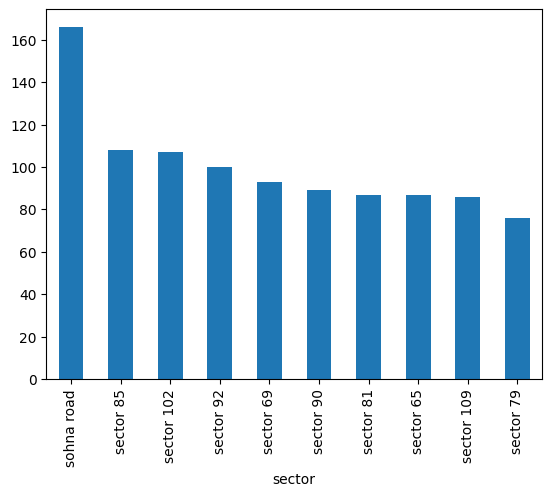

In [19]:

# top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

###Observations
* There are a total of 104 unique sectors in the dataset.

* Frequency distribution of sectors:

  * Very High (>100): 3 sectors have more than 100 listings.

  * High (50-100): 25 sectors have between 50 to 100 listings.

  * Average (10-49): A majority, 60 sectors, fall in this range with 10 to 49 listings each.

  * Low (2-9): 16 sectors have between 2 to 9 listings.

  * Very Low (1): Interestingly, there are no sectors with only 1 listing.

# Price

In [20]:
df['price'].isna().sum()

np.int64(25)

<Axes: xlabel='price', ylabel='Count'>

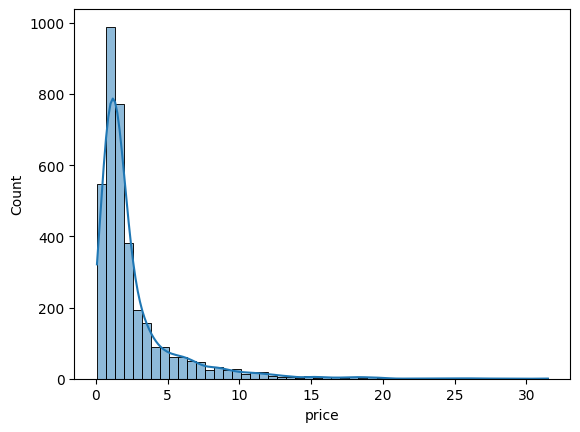

In [22]:
sns.histplot(df['price'], kde=True, bins=50)

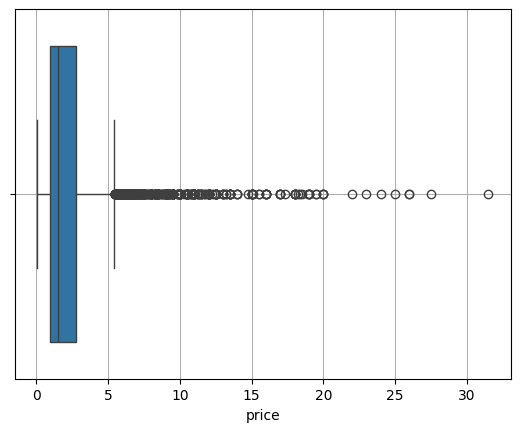

In [54]:
sns.boxplot(x=df['price'])
plt.grid()

###Descriptive Statistics:
  * Count: There are 3,660 non-missing price entries.

  * Mean Price: The average price is approximately 2.53 crores.

  * Median Price: The median (or 50th percentile) price is 1.52 crores.

  * Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.

  * Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
  * IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.

###Visualizations:
  * Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.

  * Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
  
###Missing Values: There are 17 missing values in the price column.

In [56]:
# skewness and kurtosis

skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print('skewness : ',skewness,'kurtosis : ',kurtosis)

skewness :  3.2805135278754602 kurtosis :  14.945474656501526


###Skewness: Is the data more stretched out to the left or right?
  * Positive Skew (like your data: 3.28):
  * Tail is on the right side
  * Most values are small, but a few are very large

###Kurtosis: Does your data have more extreme values (outliers) than normal?
  * High Kurtosis (>3, like yours: 14.93):
  * There are a lot of outliers
  * Distribution has very sharp peak and heavy tails

In [25]:
# Quantile Analysis

quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])
quantiles

,price
0.01,0.250
0.05,0.370
0.95,8.500
0.99,15.252


###Quantile Analysis:

  * 1% Quantile: Only 1% of properties are priced below 0.25 crores.
  * 5% Quantile: 5% of properties are priced below 0.37 crores.
  * 95% Quantile: 95% of properties are priced below 8.5 crores.
  * 99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

In [26]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

np.float64(1.8)

In [27]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [28]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 23)

In [29]:
outliers['price'].describe()

,price
count,425.000000
mean,9.235624
std,4.065259
min,5.460000
25%,6.460000
50%,8.000000
75%,10.750000
max,31.500000


###Outliers Analysis (using IQR method):

  * Based on the IQR method, there are 425 properties considered as outliers.
  * These outliers have an average price of approximately 9.24 crores.
  * The range for these outliers is from 5.46 crores to 31.5 crores.

<Axes: xlabel='price'>

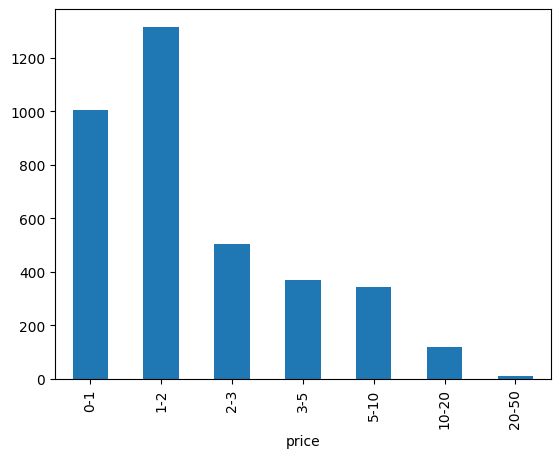

In [30]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

# pd.cut() is a Pandas function used to divide (or bin) continuous values into categories or ranges.


1. The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
2. There's a significant drop in the number of properties priced above "5 crores."

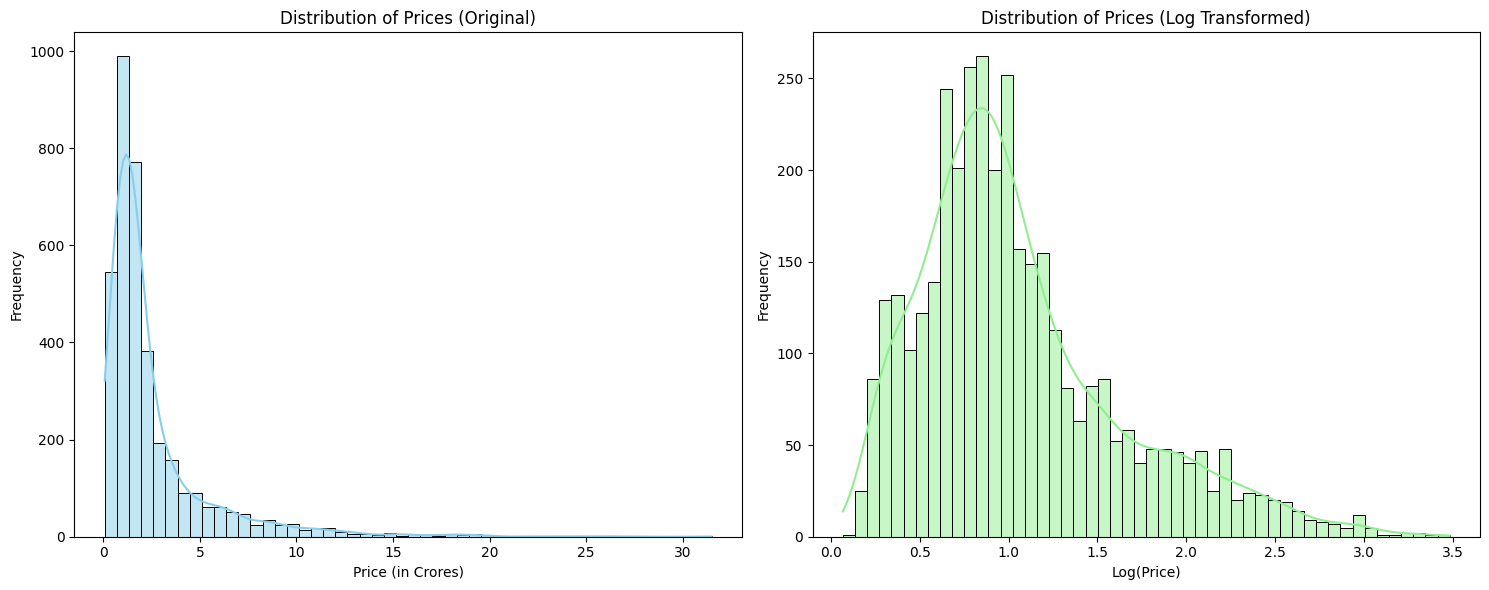

In [31]:
plt.figure(figsize=(15,6))

# distribution plot without log transformation
plt.subplot(1,2,1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### log1p = log(1+x)
1. Original price data is highly skewed (many low prices, a few very high ones), which makes it hard for models to learn properly.

2. np.log1p(x) applies a log transformation that compresses large values and expands small ones, making the data more balanced.

3. This helps to reduce the effect of outliers and makes the distribution closer to normal

4. It also works safely with zero values (log1p(0) = 0)

In [32]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0749806407809486 0.9670374733524159


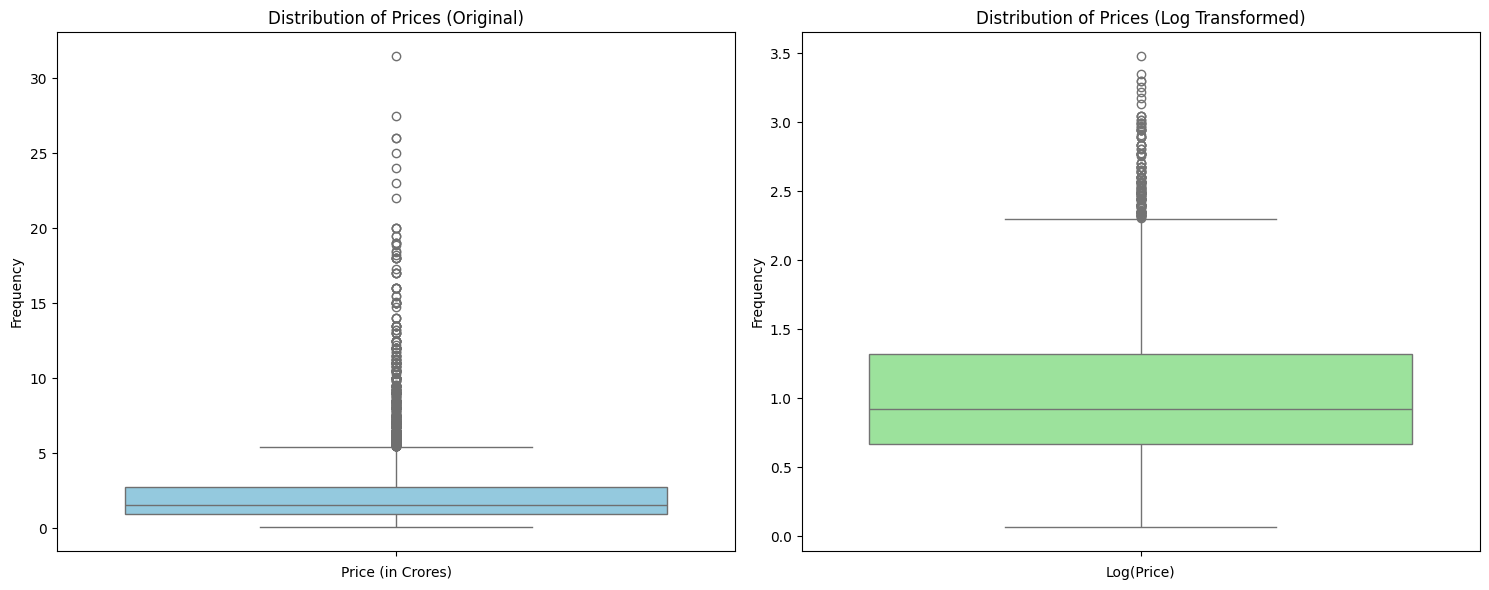

In [33]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# price_per_sqft

In [34]:
df['price_per_sqft'].isna().sum()

np.int64(25)

In [35]:
df['price_per_sqft'].describe()

,price_per_sqft
count,3663.000000
mean,13906.648922
std,23222.823585
min,4.000000
25%,6818.000000
50%,9020.000000
75%,13883.000000
max,600000.000000


<Axes: xlabel='price_per_sqft', ylabel='Count'>

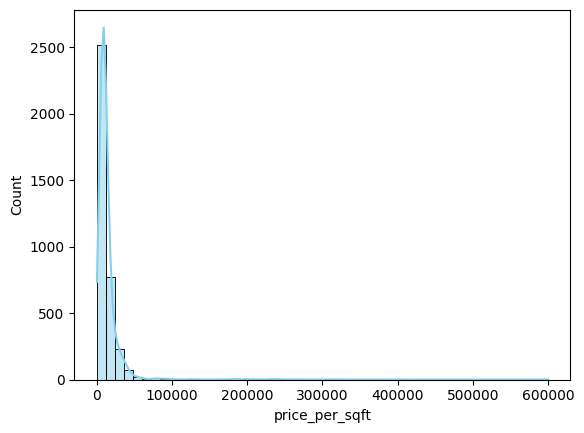

In [36]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

<Axes: ylabel='price_per_sqft'>

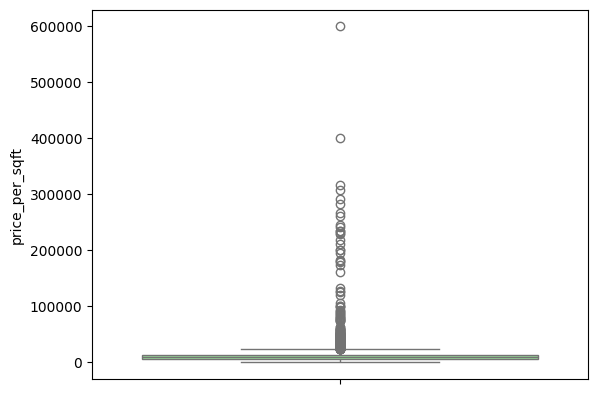

In [37]:
sns.boxplot(df['price_per_sqft'],color='lightgreen')

The box plot clearly shows several outliers, especially on the higher side

IQR is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers

###Observations
* Potential Outliers
* Right Skewed
* 17 missing values

# bedRoom

In [64]:
df['bedRoom'].isnull().sum()

np.int64(0)

<Axes: xlabel='bedRoom'>

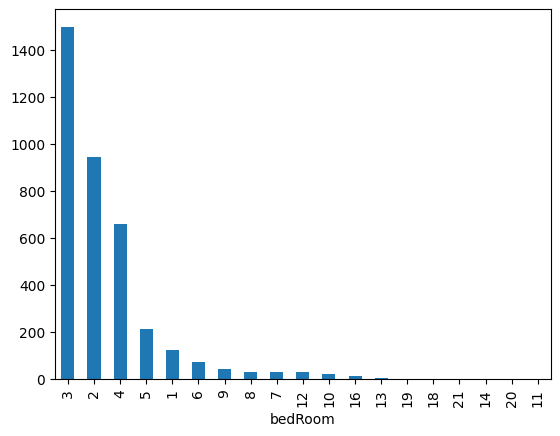

In [66]:
df['bedRoom'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

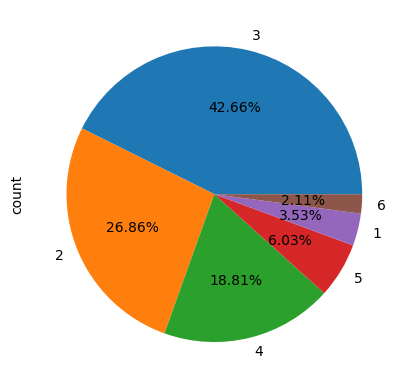

In [73]:
df['bedRoom'].value_counts().head(6).plot(kind='pie',autopct='%0.2f%%')

# bathroom

### 1. very strong colleration between bathroom and bedroom

In [76]:
df['bathroom'].isnull().sum()

np.int64(0)

In [78]:
df['bathroom'].value_counts()

,count
bathroom,
3,1078
2,1051
4,821
5,294
1,157
6,119
9,42
7,40
8,26


<Axes: xlabel='bathroom'>

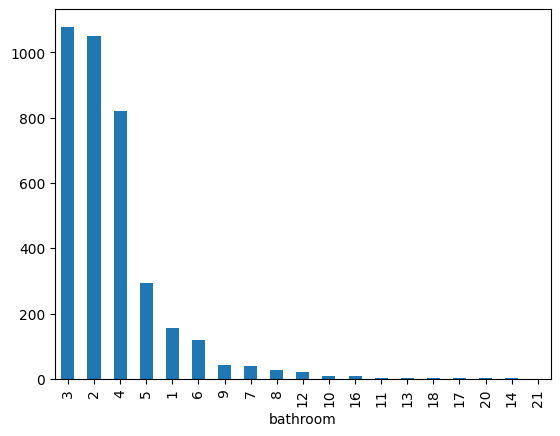

In [79]:
df['bathroom'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

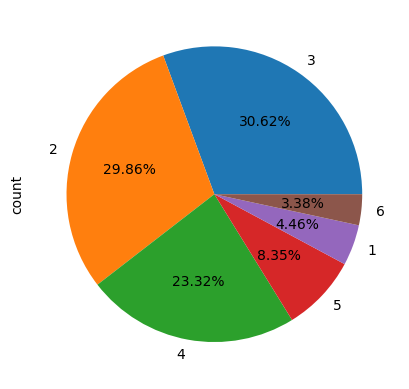

In [80]:
df['bathroom'].value_counts().head(6).plot(kind='pie',autopct='%0.2f%%')

# balcony

In [83]:
df['balcony'].isnull().sum()

np.int64(0)

In [85]:
df['balcony'].value_counts()

,count
balcony,
3+,1173
3,1075
2,885
1,369
0,186


<Axes: ylabel='count'>

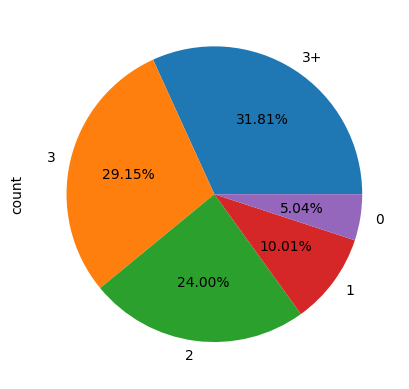

In [87]:
df['balcony'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3688 entries, 0 to 3813
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3688 non-null   object 
 1   society              3687 non-null   object 
 2   sector               3688 non-null   object 
 3   price                3663 non-null   float64
 4   price_per_sqft       3663 non-null   float64
 5   area                 3663 non-null   float64
 6   areaWithType         3688 non-null   object 
 7   bedRoom              3688 non-null   int64  
 8   bathroom             3688 non-null   int64  
 9   balcony              3688 non-null   object 
 10  floorNum             3669 non-null   float64
 11  facing               2633 non-null   object 
 12  agePossession        3688 non-null   object 
 13  super_built_up_area  1875 non-null   float64
 14  built_up_area        1700 non-null   float64
 15  carpet_area          1874 non-null   float6

In [92]:
df['floorNum']

,floorNum
0,2.0
1,0.0
2,2.0
3,3.0
4,12.0
...,...
3809,11.0
3810,1.0
3811,3.0
3812,2.0


In [93]:
df['floorNum'].isnull().sum()

np.int64(19)

In [94]:
df['floorNum'].value_counts()

,count
floorNum,
2.0,500
3.0,499
1.0,353
4.0,318
8.0,195
6.0,183
10.0,179
7.0,176
5.0,169


<Axes: xlabel='floorNum'>

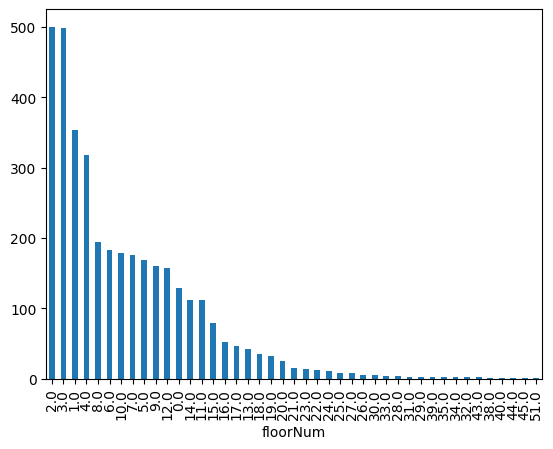

In [95]:
df['floorNum'].value_counts().plot(kind='bar')

<Axes: ylabel='floorNum'>

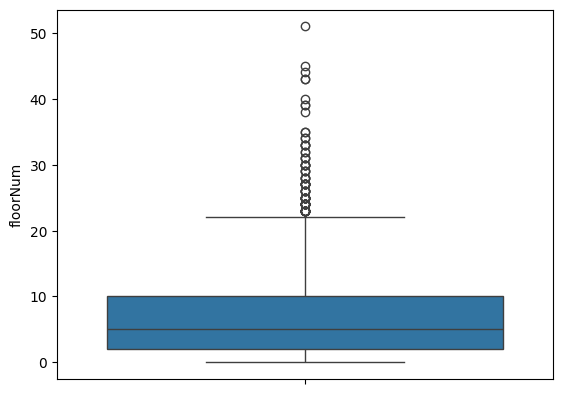

In [99]:
sns.boxplot(df['floorNum'])

###Descriptive Statistics:
  * The majority of the properties lie between the ground floor (0) and the 25th floor.

  * Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.

  * There are a few properties located at higher floors, but their frequency is much lower.

  * The box plot reveals that the majority of the properties are concentrated around the lower floors.

  * The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
  * Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.


# facing

In [100]:
df['facing']

,facing
0,NaN
1,NaN
2,South
3,East
4,NaN
...,...
3809,West
3810,NaN
3811,West
3812,South-East


In [101]:
df['facing'].isnull().sum()

np.int64(1055)

In [102]:
df['facing'].value_counts()

,count
facing,
North-East,624
East,622
North,388
West,249
South,231
North-West,193
South-East,173
South-West,153


<Axes: ylabel='count'>

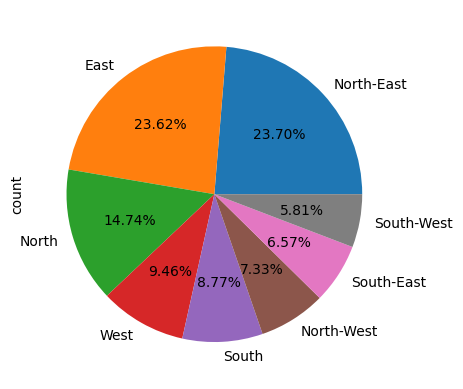

In [104]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

# agePossession

In [106]:
df['agePossession'].head()

,agePossession
0,Undefined
1,Relatively New
2,Under Construction
3,Relatively New
4,Under Construction


In [107]:
df['agePossession'].isnull().sum()

np.int64(0)

In [108]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1646
New Property,595
Moderately Old,565
Undefined,314
Old Property,303
Under Construction,265


<Axes: xlabel='agePossession'>

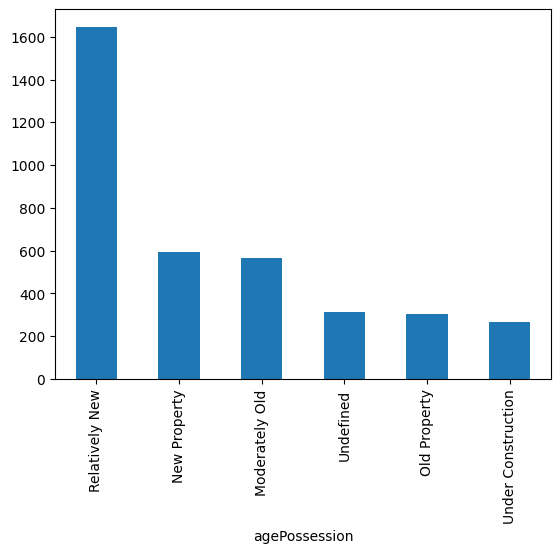

In [109]:
df['agePossession'].value_counts().plot(kind='bar')

some property ageprossession = undefined

# areas

### 1. super built up area

In [114]:
df['super_built_up_area'].isnull().sum()

np.int64(1813)

In [115]:
df['super_built_up_area'].describe()

,super_built_up_area
count,1875.000000
mean,1925.237627
std,764.172177
min,89.000000
25%,1479.500000
50%,1828.000000
75%,2215.000000
max,10000.000000


<Axes: xlabel='super_built_up_area', ylabel='Count'>

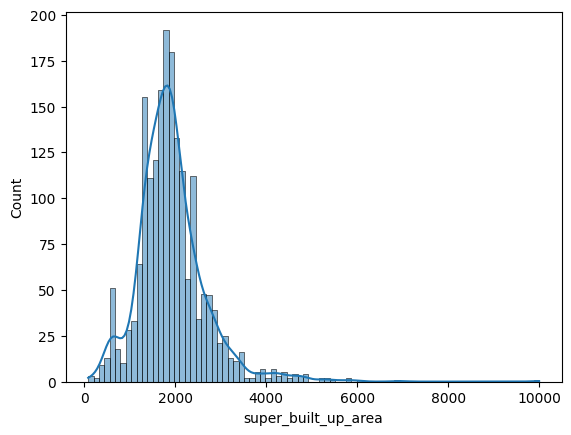

In [119]:
sns.histplot(df['super_built_up_area'].dropna(),kde=True)

<Axes: ylabel='super_built_up_area'>

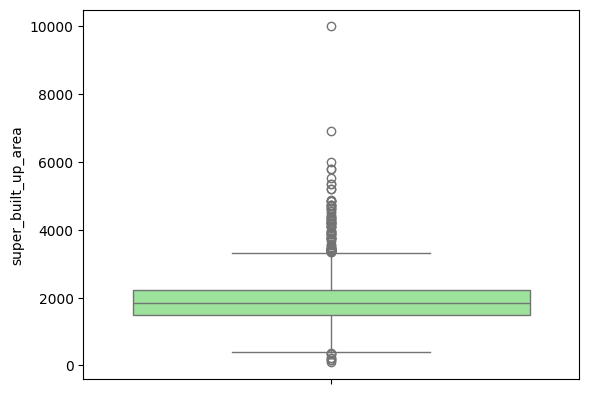

In [120]:
sns.boxplot(df['super_built_up_area'].dropna(), color='lightgreen')

###Descriptive Statistics:
  * Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.

  * There are a few properties with a significantly larger area, leading to a right-skewed distribution.


  * The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.


  * There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.


### 2. built up area

In [121]:
df['built_up_area'].isnull().sum()

np.int64(1988)

In [122]:
df['built_up_area'].describe()

,built_up_area
count,1700.000000
mean,2371.246488
std,17890.400234
min,2.000000
25%,1100.000000
50%,1650.000000
75%,2400.000000
max,737147.000000


<Axes: xlabel='built_up_area', ylabel='Count'>

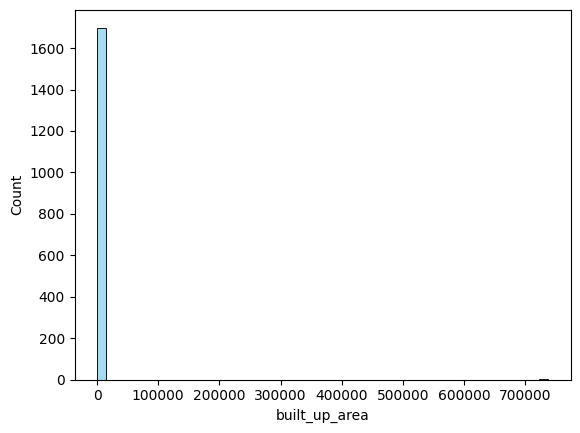

In [123]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='built_up_area'>

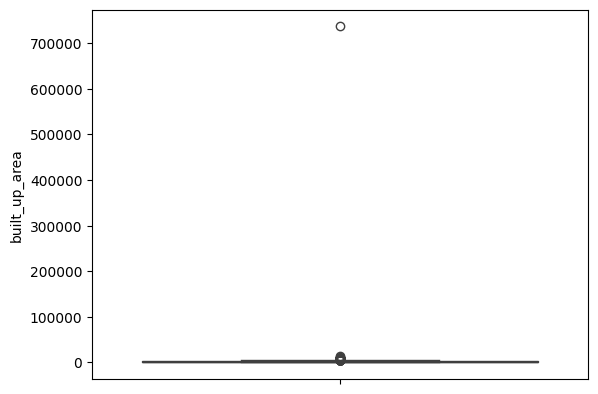

In [124]:
sns.boxplot(df['built_up_area'].dropna())

###Descriptive Statistics:
  * Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
  * There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.



  * The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.

 ### The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.


### 3. carpet area

In [125]:
df['carpet_area'].isnull().sum()

np.int64(1814)

In [126]:
df['carpet_area'].describe()

,carpet_area
count,1874.000000
mean,2528.298761
std,22787.684870
min,15.000000
25%,845.000000
50%,1300.000000
75%,1790.750000
max,607936.000000


<Axes: xlabel='carpet_area', ylabel='Count'>

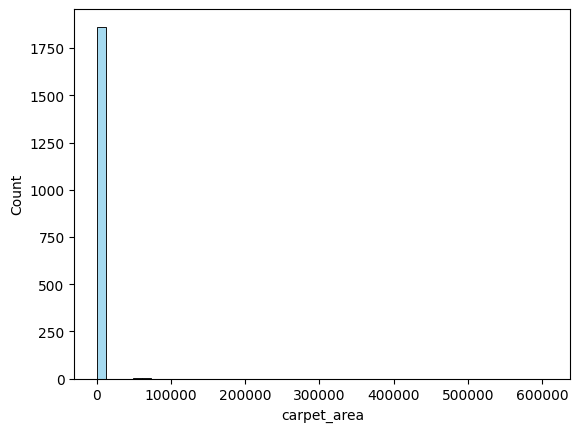

In [127]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='carpet_area'>

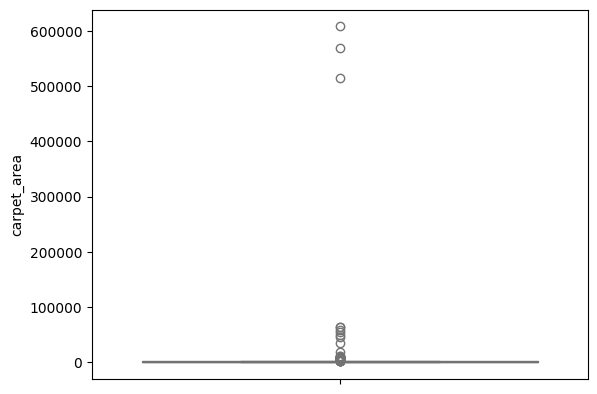

In [129]:
sns.boxplot(df['carpet_area'].dropna(), color='lightgreen')

In [130]:
df.iloc[:,16:]

,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,119
2,0,0,0,0,0,0,144
3,0,0,1,0,0,1,75
4,0,0,0,0,0,0,24
...,...,...,...,...,...,...,...
3809,0,0,0,0,0,0,49
3810,0,0,0,0,0,0,0
3811,1,1,0,1,0,0,21
3812,0,1,0,0,0,1,123


# additional rooms

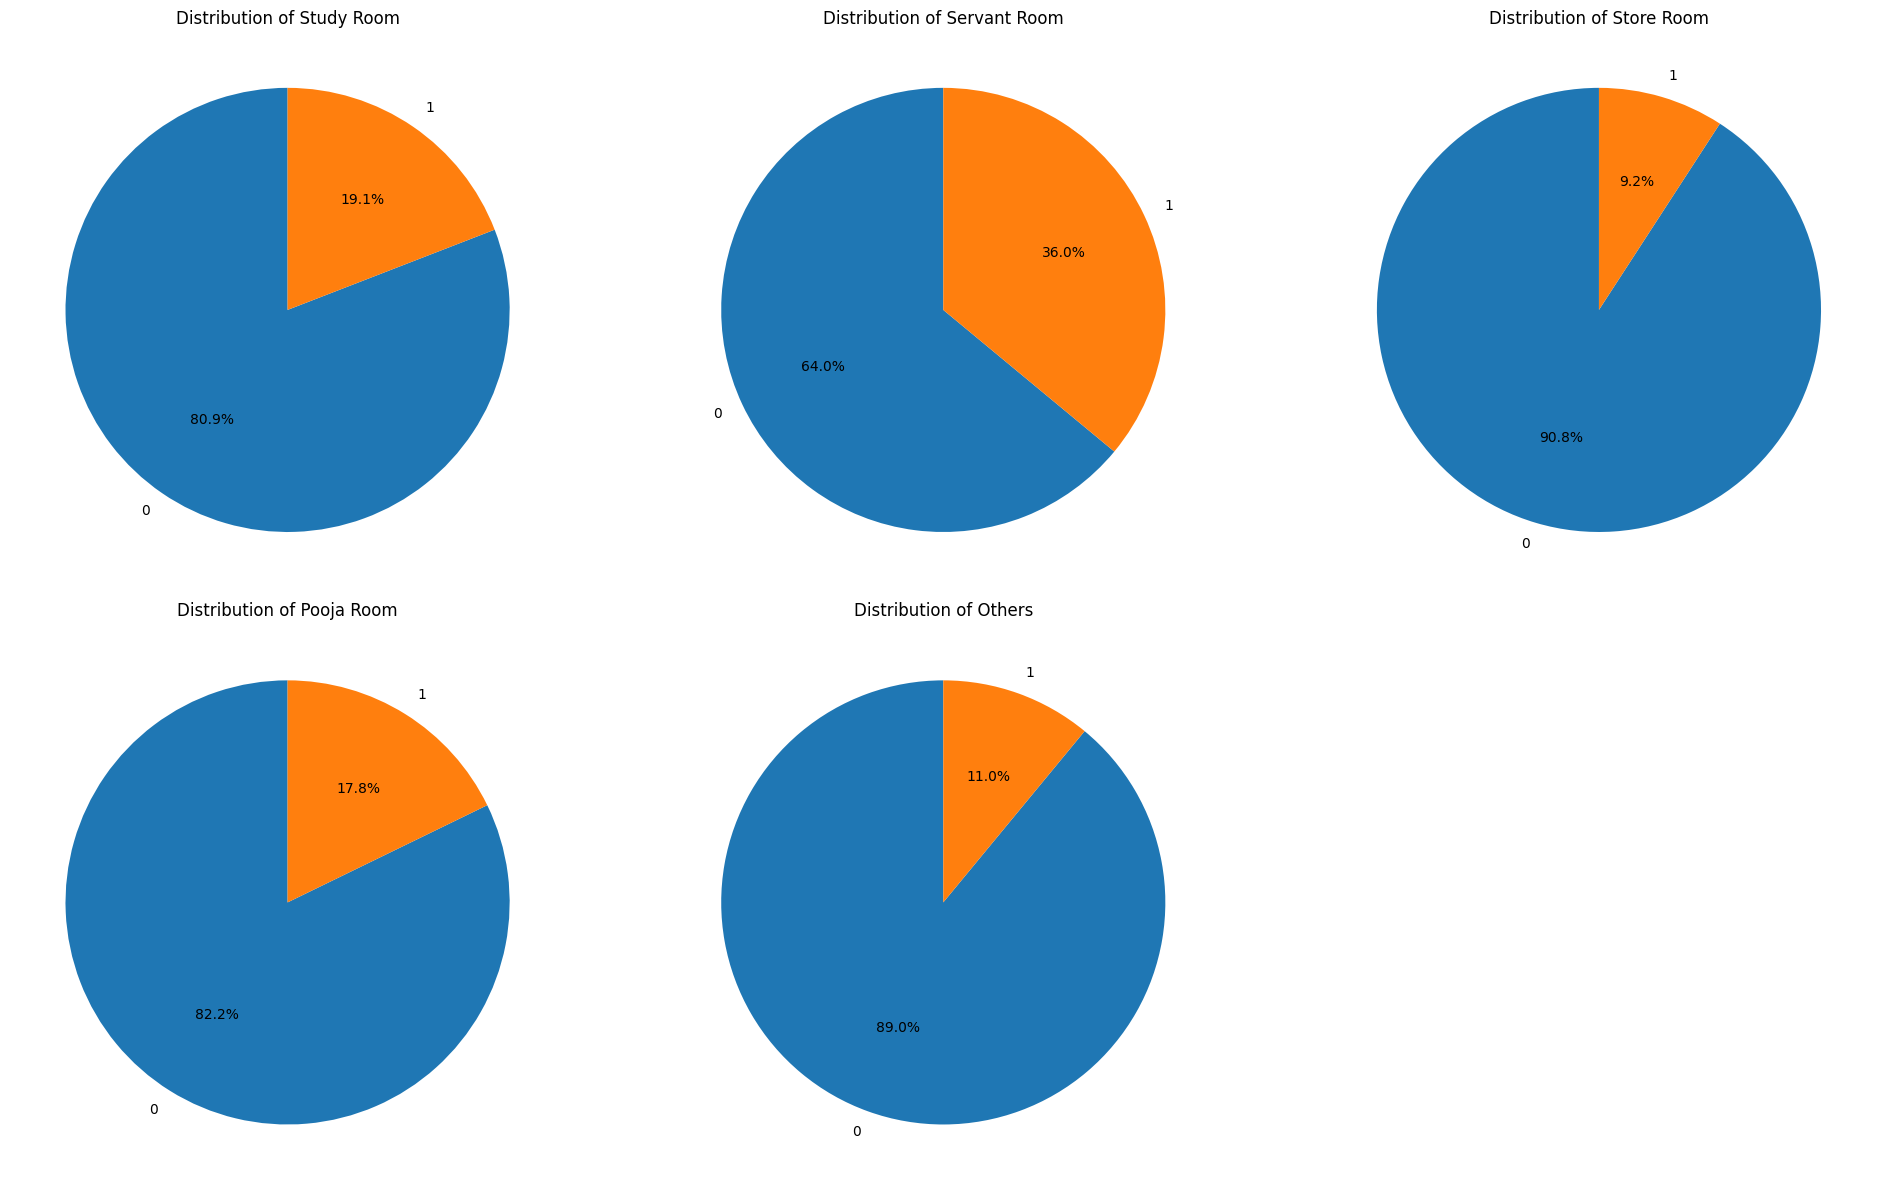

In [133]:
plt.figure(figsize=(20, 12))
for idx,room in enumerate(['study room','servant room','store room','pooja room','others'],1):
  ax = plt.subplot(2,3,idx)
  df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,ax=ax)
  plt.title(f'Distribution of {room.title()}')
  plt.ylabel('')

plt.tight_layout()
plt.show()

# furnishing type

In [134]:
df['furnishing_type'].value_counts()

,count
furnishing_type,
0,2446
1,1039
2,203


<Axes: ylabel='count'>

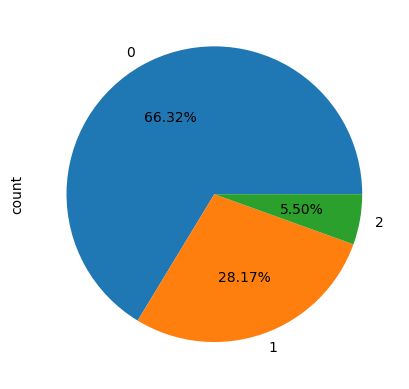

In [135]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

# luxury score

In [136]:
df['luxury_score'].isnull().sum()

np.int64(0)

In [137]:
df['luxury_score'].describe()

,luxury_score
count,3688.000000
mean,71.283894
std,53.122147
min,0.000000
25%,31.000000
50%,58.000000
75%,110.000000
max,174.000000


<Axes: xlabel='luxury_score', ylabel='Count'>

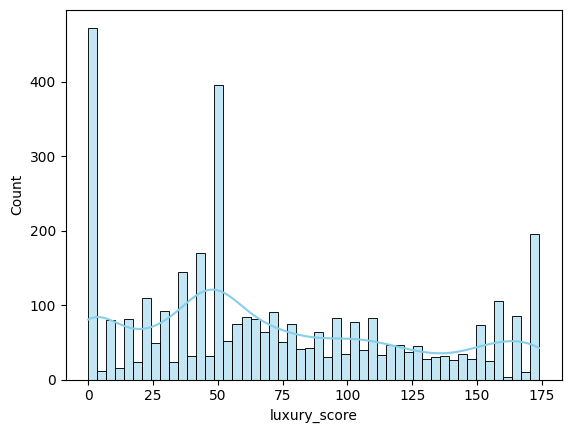

In [138]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='luxury_score'>

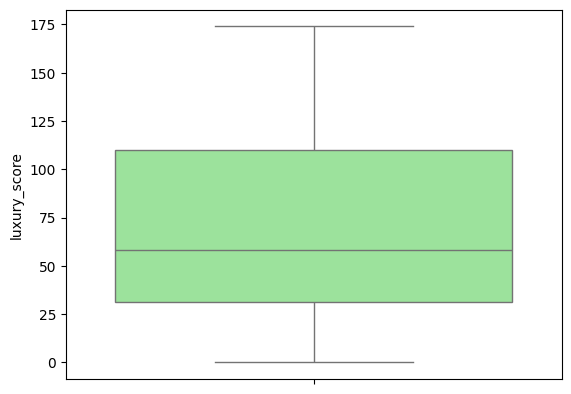

In [139]:
sns.boxplot(df['luxury_score'], color='lightgreen')

The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values

In [140]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 105,0.74,7400.0,1000.0,Built Up area: 1000 (92.9 sq.m.),3,3,0,...,NaN,1000.0,NaN,0,0,0,0,0,0,0
1,flat,tulip ivory,sector 70,5.00,10416.0,4800.0,Carpet area: 4800 (445.93 sq.m.),6,7,3+,...,NaN,NaN,4800.0,1,1,0,0,0,0,119
2,flat,signature global park,sohna road,0.90,8035.0,1120.0,Super Built up area 1120(104.05 sq.m.),3,2,2,...,1120.0,NaN,NaN,0,0,0,0,0,0,144
3,house,independent,sector 47,5.15,26615.0,1935.0,Plot area 215(179.77 sq.m.),9,9,3+,...,NaN,1935.0,NaN,0,0,1,0,0,1,75
4,flat,central park flower valley aqua front towers,sector 33,1.70,9502.0,1789.0,Super Built up area 1789(166.2 sq.m.),3,3,3,...,1789.0,NaN,NaN,0,0,0,0,0,0,24
